Vectorize words


A document represented as a vector of word counts is call a "Bag of words"

Use cosine similarity on vectors made to determine similarity

Can imporove Bag of Words by adjusting word counts based on their frequency in corpus(group of all documents)

Term Frequency - Importance of term within document
TF(d,t) = Number of occurrences of term t in document d

Inverse Document Frequency- Importance of the term in the corpus
IDF(t) = log(D/t)
D = total number of documents
t = number of documents with the term


In [3]:
import nltk

In [11]:
#nltk.download_shell()

In [30]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [32]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [34]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [36]:
#this is a tab separated file
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Get it to a dataframe

In [44]:
import pandas as pd

In [46]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t',
                       names = ['label', 'message'])

In [48]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Explore

In [51]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [53]:
# groupby label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [55]:
# make new column for message length
messages['length'] = messages['message'].apply(len)

In [57]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# import and visualize

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

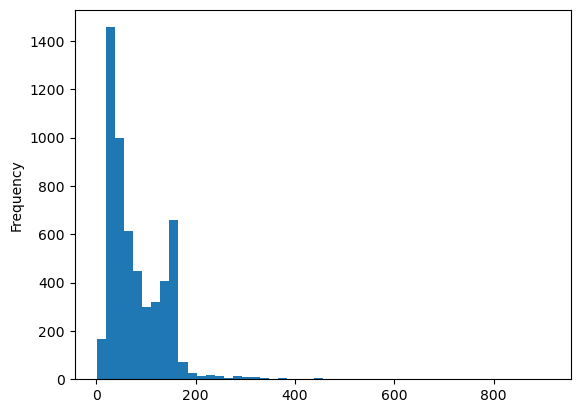

In [62]:
messages['length'].plot.hist(bins = 50)

In [64]:
#what is the max length
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [70]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

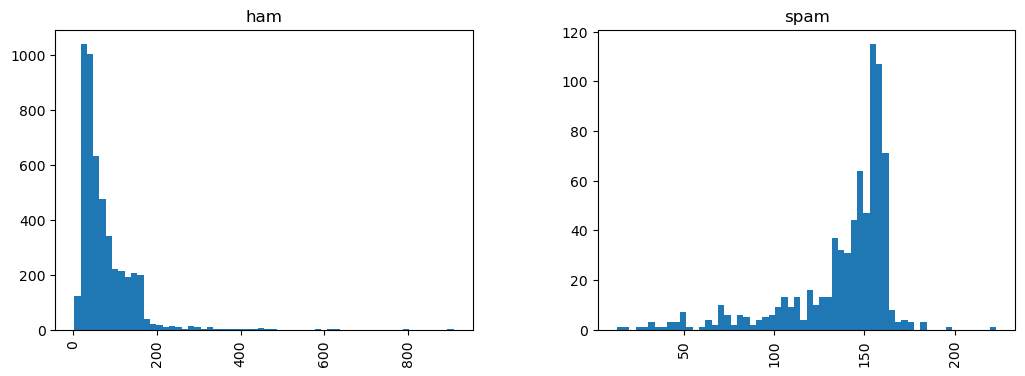

In [74]:
messages.hist(column = 'length', by = 'label', bins = 60, figsize=(12,4))

# NPL Lecture 2

In [77]:
import string

In [79]:
mess = 'Sample message! Notice: it has punctuation.'

In [81]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
#removes punctuatio
nopunc = [c for c in mess if c not in string.punctuation]

In [85]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [87]:
# get stop words and remove them
from nltk.corpus import stopwords

In [89]:
#all the stop words
#stopwords.words('english')

In [91]:
nopunc = ''.join(nopunc)

In [93]:
nopunc

'Sample message Notice it has punctuation'

# How this works

In [96]:
x = ['a', 'b', 'c', 'd']

In [98]:
''.join(x)

'abcd'

# Back to work

In [101]:
nopunc

'Sample message Notice it has punctuation'

In [103]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [105]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [107]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

# Make a function

In [136]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [138]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [140]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization Time

In [143]:
# count how many times a word occurs in each message to get term frequency
# weigh tht counts so that frequent tokens get lower weight (invers document frequency)
# Normalize the vectors to unit length to abstact from the original text lenght (L2_norm)

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [153]:
print(len(bow_transformer.vocabulary_))

11425


In [156]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [160]:
bow4 = bow_transformer.transform([mess4])

In [198]:
#there are 7 unique words in bow4 example
#2 coppies and rest only appear once

print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [200]:
print(bow4.shape)

(1, 11425)


In [202]:
#get individual feature names
bow_transformer.get_feature_names_out()[4068]

'U'

# NLP Lecuture 3

In [211]:
messages_bow = bow_transformer.transform(messages['message'])

In [217]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [219]:
#compare number of non zero messages to messages with values

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [225]:
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer

In [227]:
tfidf_tranformer = TfidfTransformer().fit(messages_bow)

In [231]:
#test for single message
tfidf4 = tfidf_tranformer.transform(bow4)

In [233]:
#weight values for word
print(tfidf4)

  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


In [241]:
#weight of value
tfidf_tranformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [243]:
#apply to all
messages_tfidf = tfidf_tranformer.transform(messages_bow)

In [245]:
from sklearn.naive_bayes import MultinomialNB

In [247]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [251]:
#test example
spam_detect_model.predict(tfidf4)[0]

'ham'

In [253]:
#all data
all_pred = spam_detect_model.predict(messages_tfidf)

# Testing Time

In [258]:
from sklearn.model_selection import train_test_split

In [260]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],
                                                                messages['label'],
                                                                test_size = 0.3)

# Pipeline storage

In [263]:
from sklearn.pipeline import Pipeline

In [265]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [267]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E2DB652020>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [269]:
predictions = pipeline.predict(msg_test)

In [271]:
from sklearn.metrics import classification_report,confusion_matrix

In [273]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1449
        spam       1.00      0.67      0.80       223

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

